In [33]:
import torch
import numpy as np

In [11]:
mnist_train_images, mnist_train_labels = torch.load("training.pt")

In [15]:
import matplotlib.pyplot as plt

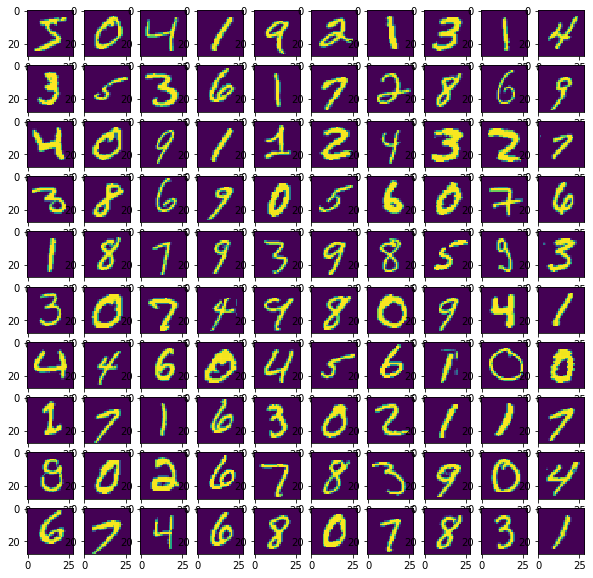

In [21]:
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(100):
    r = int(i/10)
    c = i%10
    axs[r][c].imshow(mnist_train_images[i])
plt.show()

In [22]:
mnist_subset_indices = [1, 21, 51, 
                        3, 6, 70, 
                        5, 76, 16,
                        7, 27, 50,
                        9, 20, 92,
                        65, 35, 0,
                        13, 18, 36,
                        38, 52, 79,
                        46, 97, 17,
                        57, 4, 45]

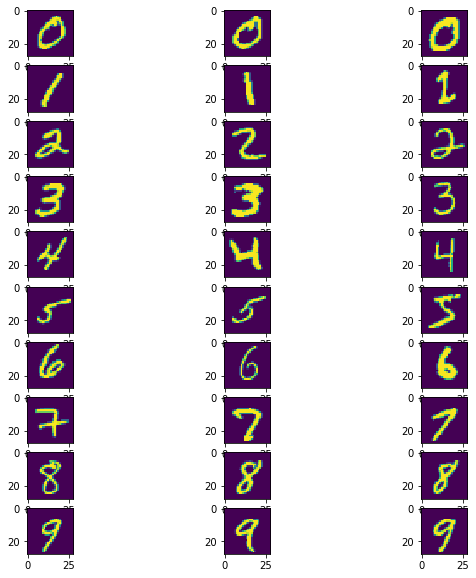

In [27]:
fig, axs = plt.subplots(10, 3, figsize=(10, 10))
for i, idx in enumerate(mnist_subset_indices):
    r = int(i/3)
    c = i%3
    axs[r][c].imshow(mnist_train_images[idx])
plt.show()

In [36]:
mnist_subset_images = mnist_train_images[mnist_subset_indices].numpy()
mnist_subset_labels = mnist_train_labels[mnist_subset_indices].numpy()
mnist_subset = {"X":mnist_subset_images, "Y":mnist_subset_labels}

In [37]:
np.save("mnist_subset.npy", mnist_subset)

In [38]:
N = 50000 #number of neurons in simulation

In [92]:
#reshape
#mnist_subset_data = mnist_subset_images.reshape(30, -1)/255.
mnist_subset_data = mnist_subset_images.reshape(30, -1)

In [66]:
#normalize
#mnist_subset_data = (mnist_subset_data - mnist_subset_data.mean())/mnist_subset_data.std()

In [72]:
d = mnist_subset_data.shape[1]

In [73]:
random_matrix = np.random.normal(0, 1, (d, N))

In [93]:
mnist_samples = np.matmul(mnist_subset_data, random_matrix)

(array([1.4700000e+02, 1.3136000e+04, 4.3478900e+05, 4.4076080e+06,
        1.4173242e+07, 1.4702582e+07, 4.9256150e+06, 5.2534700e+05,
        1.7363000e+04, 1.7100000e+02]),
 array([-5.63223339, -4.51308714, -3.39394088, -2.27479462, -1.15564837,
        -0.03650211,  1.08264414,  2.2017904 ,  3.32093666,  4.44008291,
         5.55922917]),
 <a list of 10 Patch objects>)

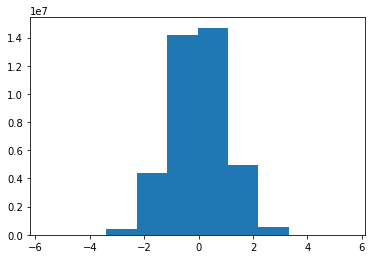

In [79]:
plt.hist(random_matrix.reshape(-1))

(array([19372.,   364.,   230.,   259.,   254.,   235.,   216.,   275.,
          318.,  1997.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

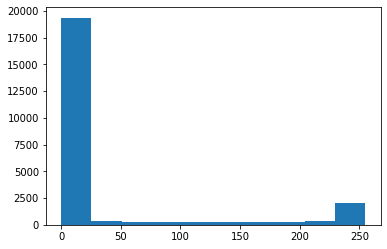

In [94]:
plt.hist(mnist_subset_data.reshape(-1))

(array([2.60000e+01, 6.03000e+02, 1.24040e+04, 1.37634e+05, 5.68540e+05,
        6.01855e+05, 1.62332e+05, 1.57780e+04, 7.96000e+02, 3.20000e+01]),
 array([-14350.70442542, -11504.02857711,  -8657.3527288 ,  -5810.67688049,
         -2964.00103218,   -117.32518387,   2729.35066443,   5576.02651274,
          8422.70236105,  11269.37820936,  14116.05405767]),
 <a list of 10 Patch objects>)

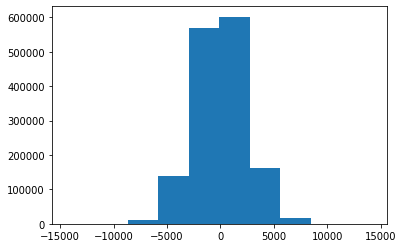

In [95]:
plt.hist(mnist_samples.reshape(-1))

In [96]:
mnist_samples = (mnist_samples - mnist_samples.mean())/mnist_samples.std()

(array([2.60000e+01, 6.03000e+02, 1.24040e+04, 1.37634e+05, 5.68540e+05,
        6.01855e+05, 1.62332e+05, 1.57780e+04, 7.96000e+02, 3.20000e+01]),
 array([-6.07280386, -4.86840237, -3.66400089, -2.4595994 , -1.25519791,
        -0.05079642,  1.15360506,  2.35800655,  3.56240804,  4.76680953,
         5.97121101]),
 <a list of 10 Patch objects>)

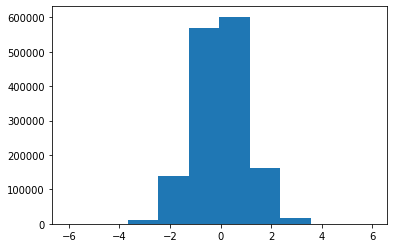

In [97]:
plt.hist(mnist_samples.reshape(-1))

In [98]:
mnist_samples.shape

(30, 50000)

In [99]:
np.save("random_projected_mnist_samples.npy", mnist_samples)